# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exploratory Data Analysis - Homework

The aim of this notebook is to give you an exercise to perform an exploratory data analysis in order to extract some useful information hidden in data.

We are going to analyse the [Tennis dataset](http://tennis-data.co.uk). In order to guide your analysis, you should try to approach the problem by wondering some questions. The role of the analysis is to find the answers.

In [1]:
# Import Libraries
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Problem description

### The data
The website​ [​http://tennis-data.co.uk/alldata.php​](​http://tennis-data.co.uk/alldata.php​) gathers outcomes of both WTA​ (Women Tennis Association)​ and ATP ​(Association of Tennis Professionals - men only)​ tennis games over several years.
A short description of each variable can be found here : [http://www.tennis-data.co.uk/notes.txt](http://www.tennis-data.co.uk/notes.txt)

### What is expected from you
First of all, answer the following questions.

#### Questions
Please answer the following questions about the dataset with the appropriate line(s) of code.

##### Example

__Question​__: How many ATP matches are there in the dataset? 

__Answer​__: 
```python
len(df_atp)
```

1. Who are the three ATP players with the most wins ?
2. How many sets did the player “​Federer R.” win in total ?
3. How many sets did the player “​Federer R.” win during the years 2016 and 2017 ?
4. For each match, what is the percentage of victories of the winner in the past ?
5. How are (differently) distributed wins of players in the age segments `[16-23]`, `[24-30]` `[30+]`?
6. Does the behaviour in the previous answer changes between men and women?

_Hint_: Careful with null values and how you handle them.

#### Bonus points

* your notebook contains graphics that are both interesting and pretty
* we can go through your entire notebook without frowning
* you teach us something cool 🙂

#### Free Analysis

We would like you to perform some free analysis. For example study distributions, correlations, etc.

---

## Your Work

Have fun!

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.constrained_layout.use'] = True

font = {'size': 15}
matplotlib.rc('font', **font)

In [5]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         52298 non-null  int64         
 1   Location    52298 non-null  object        
 2   Tournament  52298 non-null  object        
 3   Date        52298 non-null  datetime64[ns]
 4   Series      52298 non-null  object        
 5   Court       52298 non-null  object        
 6   Surface     52298 non-null  object        
 7   Round       52298 non-null  object        
 8   Best of     52298 non-null  int64         
 9   Winner      52298 non-null  object        
 10  Loser       52298 non-null  object        
 11  WRank       52283 non-null  object        
 12  LRank       52220 non-null  object        
 13  W1          52035 non-null  float64       
 14  L1          52037 non-null  float64       
 15  W2          51526 non-null  object        
 16  L2          51527 non-

In [6]:
#lowercase columns name
df_atp.columns = df_atp.columns.str.lower()
#fill null with 0
df_atp['wsets'].fillna(0, inplace = True)
df_atp['lsets'].fillna(0, inplace = True)

In [7]:
df_atp.describe()

,atp,best of,w1,l1,w4,l4,w5,l5,wsets,cbw,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
count,52298.000000,52298.000000,52035.000000,52037.000000,4731.000000,4731.000000,1791.000000,1791.000000,52298.000000,17506.000000,...,10671.000000,10671.000000,28131.000000,28142.000000,15572.000000,15579.000000,22745.000000,22745.000000,22745.000000,22745.000000
mean,33.222532,3.372366,5.794331,4.056229,5.777003,3.863454,6.637633,3.756002,2.132586,1.812080,...,1.815867,3.542479,1.810226,3.451461,1.796538,3.557943,1.998610,8.326076,1.834821,3.594448
std,18.115493,0.778516,1.239577,1.845206,1.274712,1.895683,2.290596,2.817183,0.480148,0.868254,...,0.996238,3.646316,1.031691,3.075889,1.004273,3.272510,1.628982,397.235666,1.107884,3.282610
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.010000,1.020000,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,19.000000,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,2.000000,1.280000,...,1.240000,1.750000,1.250000,1.730000,1.220000,1.730000,1.290000,1.850000,1.240000,1.740000
50%,33.000000,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,3.000000,2.000000,1.550000,...,1.500000,2.500000,1.500000,2.500000,1.500000,2.630000,1.570000,2.780000,1.500000,2.550000
75%,49.000000,3.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,2.000000,2.050000,...,2.030000,3.850000,2.000000,4.000000,2.000000,4.000000,2.200000,4.540000,2.060000,3.990000
max,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,70.000000,68.000000,3.000000,14.000000,...,18.000000,60.000000,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,23.450000,36.440000


winner
Federer R.     1121
Nadal R.        891
Djokovic N.     802
dtype: int64

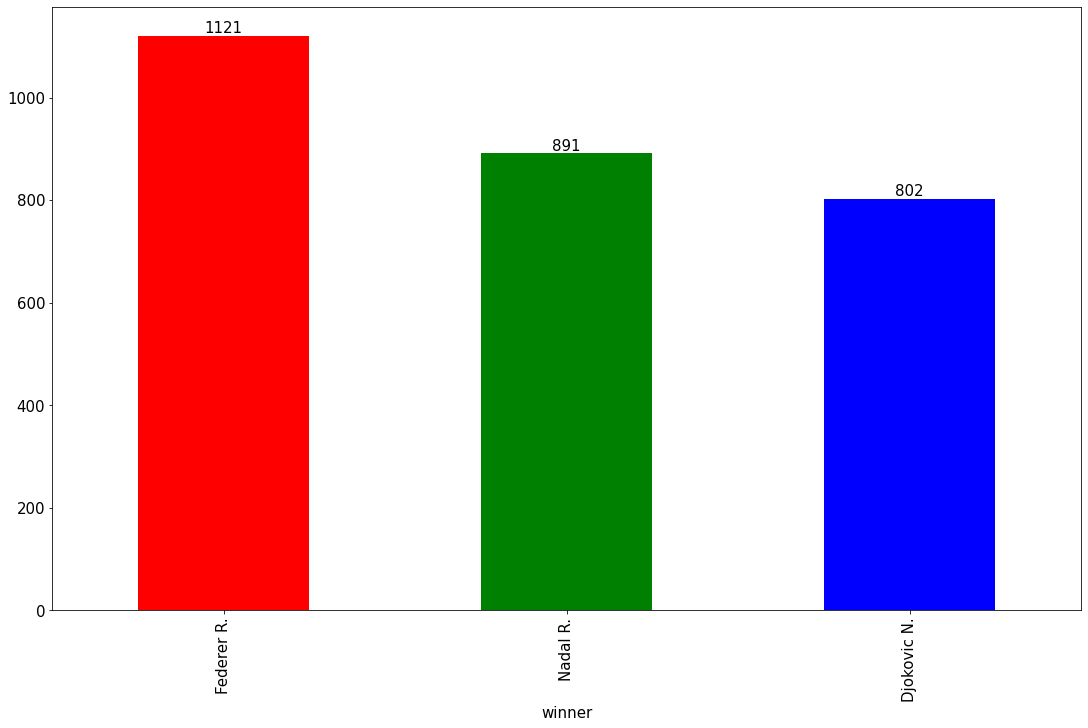

In [8]:
#Question 1
colors = ['r','g','b']
winners = df_atp.value_counts('winner')[:3]
ax = winners.plot.bar(color = colors)
ax.bar_label(ax.containers[0])
winners

Let's see percentages of victory of the strongest three, normalized to the number o games played

In [9]:
names = winners.index
for name in names:
    score = df_atp[df_atp.winner == name].winner.count()/(df_atp[df_atp.winner == name].winner.count() + df_atp[df_atp.loser == name].loser.count())
    print(name, np.round(score,4))

Federer R. 0.8285
Nadal R. 0.825
Djokovic N. 0.8294


As we can see Djokovic has an higher ratio win/games compared to Federer and Nadal
<br>
Anyway Federer has about 40% more games so his results seems to be more consistent and impressive

In [10]:
#Question 2
#Tricky data in the dataset
df_atp.loc[df_atp['lsets'] == '`1','lsets'] = 1

#Select only needed data 
df_atp['lsets'].astype('Float64', copy = False)
df_atp[(df_atp.winner == 'Federer R.')].wsets.sum() + df_atp[(df_atp.loser == 'Federer R.')].lsets.sum()

2696.0

182.0


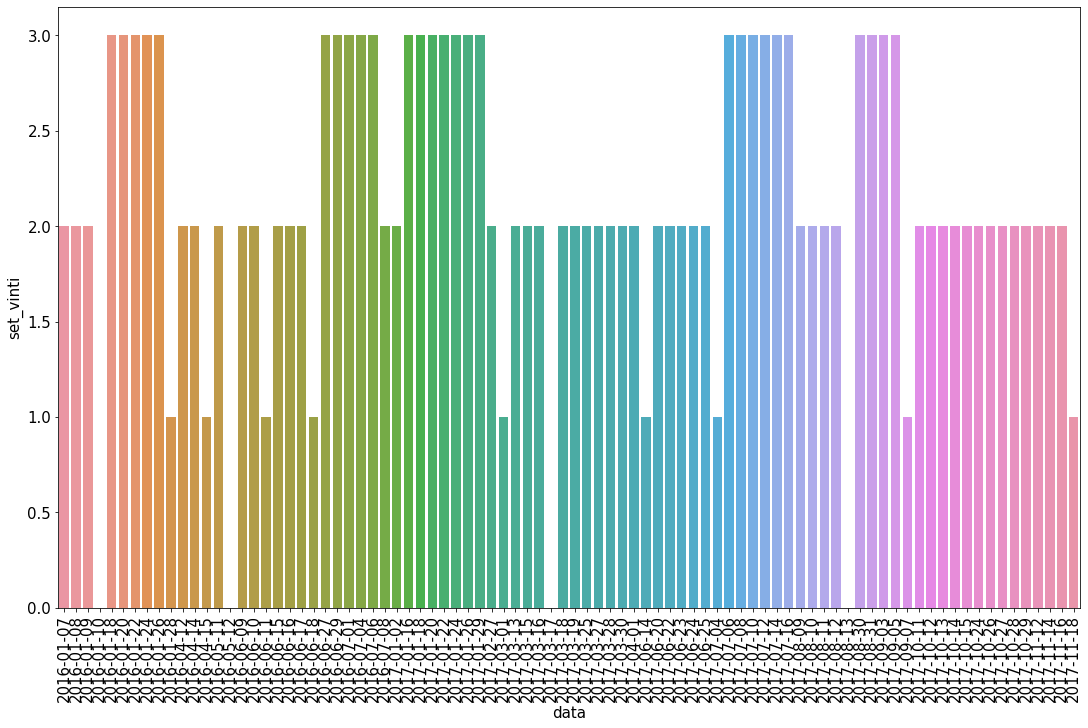

In [11]:
#Question 3
#Separate in two dataframes wins and loss of Federer
fw = df_atp[(df_atp.winner == 'Federer R.') &
            (df_atp.date >= '2016-01-01')  &
            (df_atp.date <= '2017-12-31')]
fl = df_atp[(df_atp.loser == 'Federer R.')  &
            (df_atp.date >= '2016-01-01')   &
            (df_atp.date <= '2017-12-31')]
print(fw.wsets.sum() + fl.lsets.sum())

fs = pd.DataFrame({'set_vinti':np.concatenate((fw.wsets, fl.lsets)), 'data':np.concatenate((fw.date.dt.date, fl.date.dt.date))})
#plot of sets winned during time
graph = sns.barplot(x = fs.sort_values(by = ['data']).data, y = fs.sort_values(by = ['data']).set_vinti)
for item in graph.get_xticklabels():
    item.set_rotation(90)

Federer R. 610.1201557235233
Nadal R. 634.1691564670745
Djokovic N. 611.400796002691


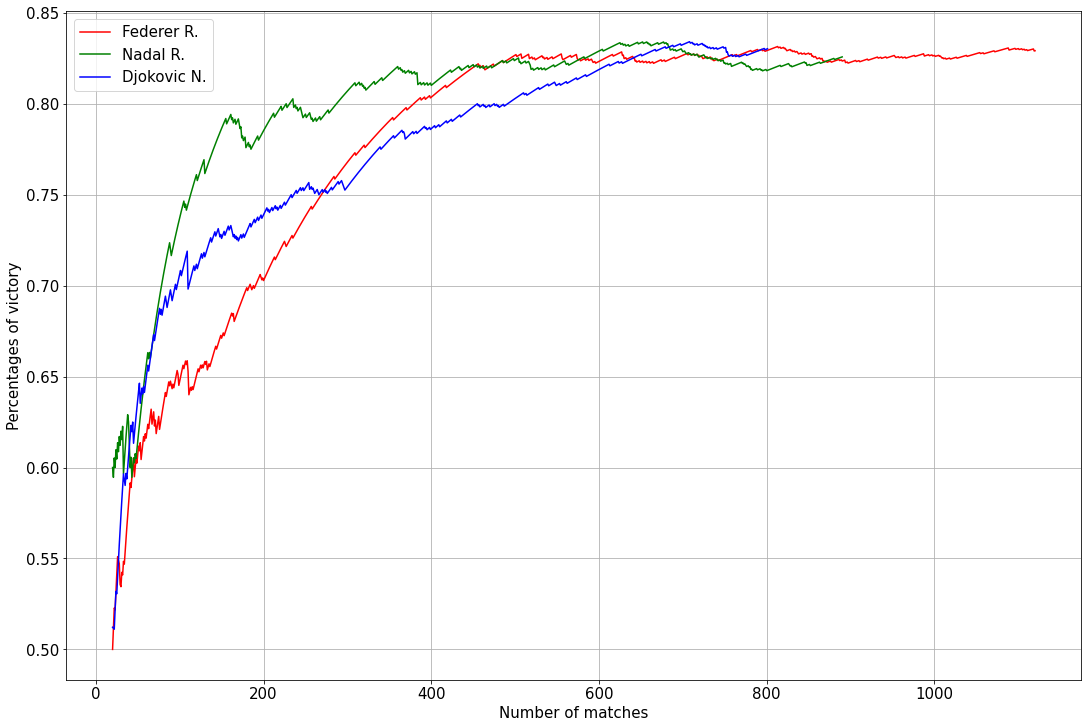

In [12]:
#Request 4
names = np.unique((list(df_atp.winner.unique()) + list(df_atp.loser.unique())))
percentages = { name:[] for name in np.unique(names) }
counters = {name:0 for name in names}
victories = {name:0 for name in names}

for wname,lname in zip(df_atp.winner, df_atp.loser):
    victories[wname] += 1
    counters[wname] += 1
    counters[lname] += 1
    percentages[wname].append((victories[wname])/counters[wname])

for name, color in zip(winners.index, colors):
    matches = range(len(percentages[name]))
    graph = sns.lineplot(x = matches[20:], y = percentages[name][20:], label = name, color = color )
    
    #Self defined measure of 'consistency' of players 
    print(name, sum(percentages[name][:800]))
    
graph.set(xlabel = 'Number of matches', ylabel = 'Percentages of victory')
graph.grid()

Winning percentages are similar over 400 matches 
<br>
You can see that Nadal had the best starting performance during his career respect to Djokovic and Federer

Now let's see the distribution of percentages over 400 matches

(0.78, 0.84)

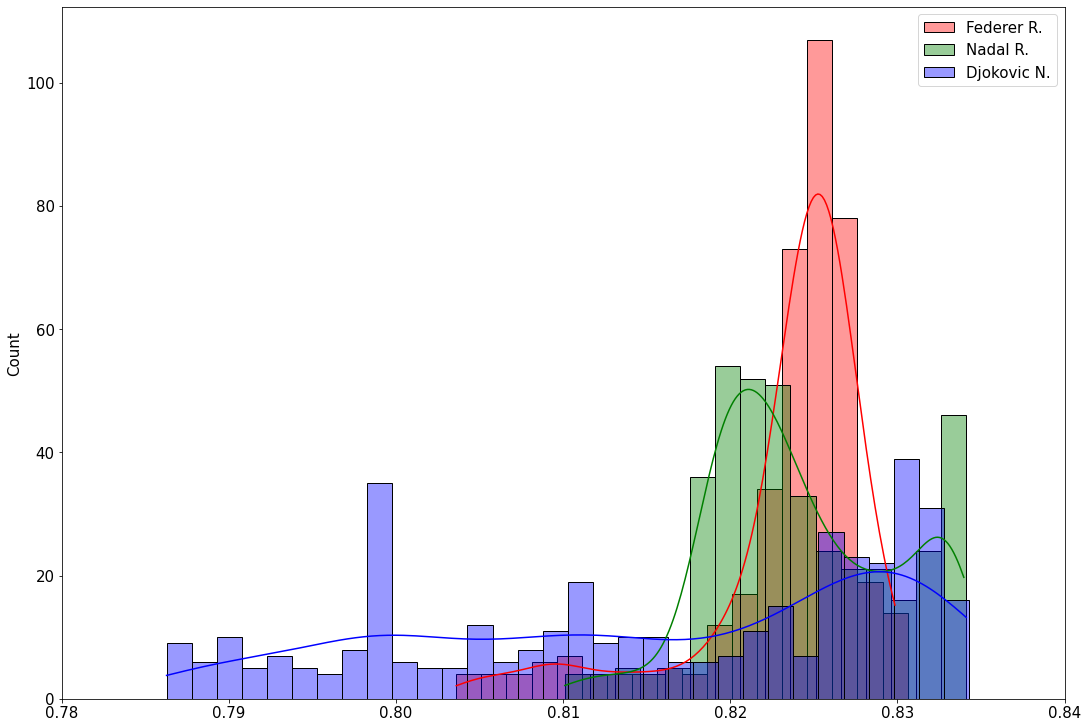

In [13]:
for name, color in zip(winners.index, colors):
    graph = sns.histplot(x = percentages[name][400:800], binwidth = 0.0015, kde = True, label = name, color = color, alpha = 0.4)
plt.legend()
plt.xlim(0.78,0.84)

Federer has a more robust performance, the variance of the distribution is lower.
<br>
But Nadal's perfomances seems to follow a bimodal distribution, which can change the sort of a prediction during a match

Let's see if there is a difference between performances on different floors

Hard
Federer R. 560.8779775841165
Nadal R. 310.5435826749544
Djokovic N. 407.1279333649929
Clay
Federer R. 146.21903861196003
Nadal R. 354.370898251921
Djokovic N. 144.08857801088027
Grass
Federer R. 144.5100210533981
Nadal R. 51.31326469598165
Djokovic N. 66.14012309472797
Carpet
Federer R. 35.17687113393483
Nadal R. 2.9769536019536016
Djokovic N. 5.1309523809523805


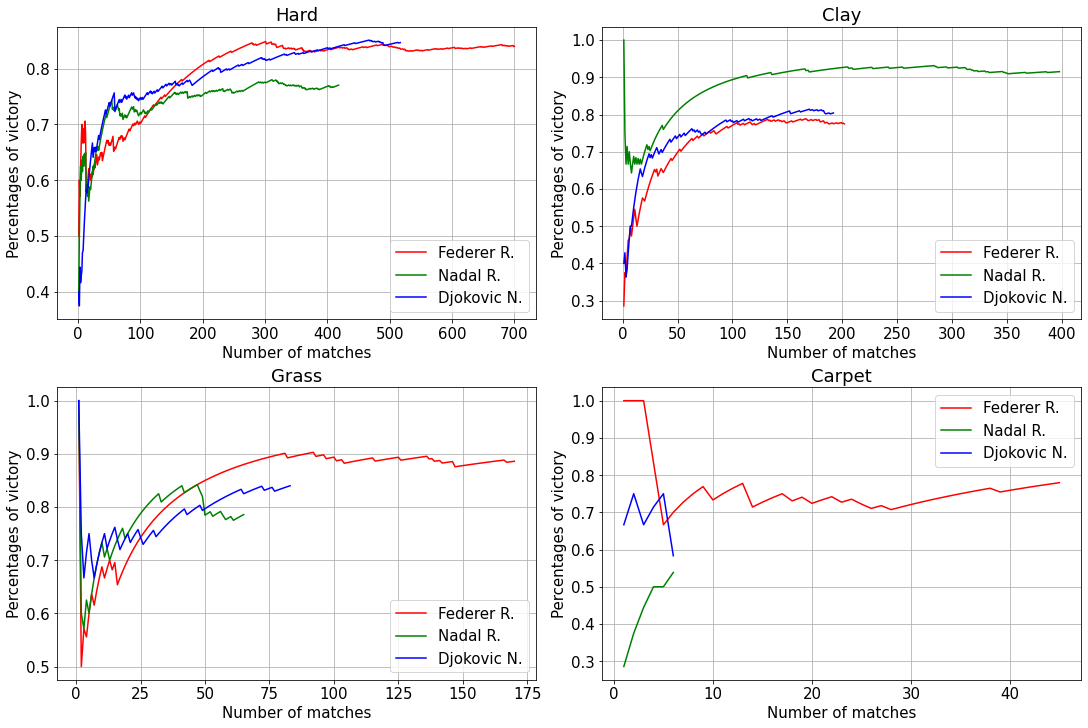

In [14]:
fig, axes = plt.subplots(2, 2, constrained_layout = True)
for ground, ax in zip(df_atp.surface.unique(), axes.ravel()):
    idx = df_atp.surface == ground
    names = np.unique((list(df_atp[idx].winner.unique())+ list(df_atp[idx].loser.unique())))
    percentages = {name:[] for name in names }
    counters = {name:0 for name in names}
    victories = {name:0 for name in names}

    for wname,lname in zip(df_atp[idx].winner, df_atp[idx].loser):
        victories[wname] += 1
        counters[wname] += 1
        counters[lname] += 1
        percentages[wname].append((victories[wname])/counters[wname])

    print(ground)
    for name, color in zip(winners.index, colors):
        matches = range(len(percentages[name]))
        graph = sns.lineplot(x = matches[1:], y = percentages[name][1:], label = name, ax = ax, color = color)
        print(name, sum(percentages[name]))
        
    graph.set(xlabel = 'Number of matches', ylabel = 'Percentages of victory', title = ground)
    graph.grid()

As you can see in the grpahs the performance change based on floors
<br>
Federer has the upper hand on hard floor, Nadal dominates on clay
<br>
To be noted that number of matches disputed by Federer is significantly higher on carpet and grass

Let's see now the differences between indoor and outdoor

Outdoor
Federer R. 690.2474674449793
Nadal R. 676.8105040940312
Djokovic N. 542.7263209117673
Indoor
Federer R. 189.1157413427549
Nadal R. 39.76175527588683
Djokovic N. 76.95555566250133


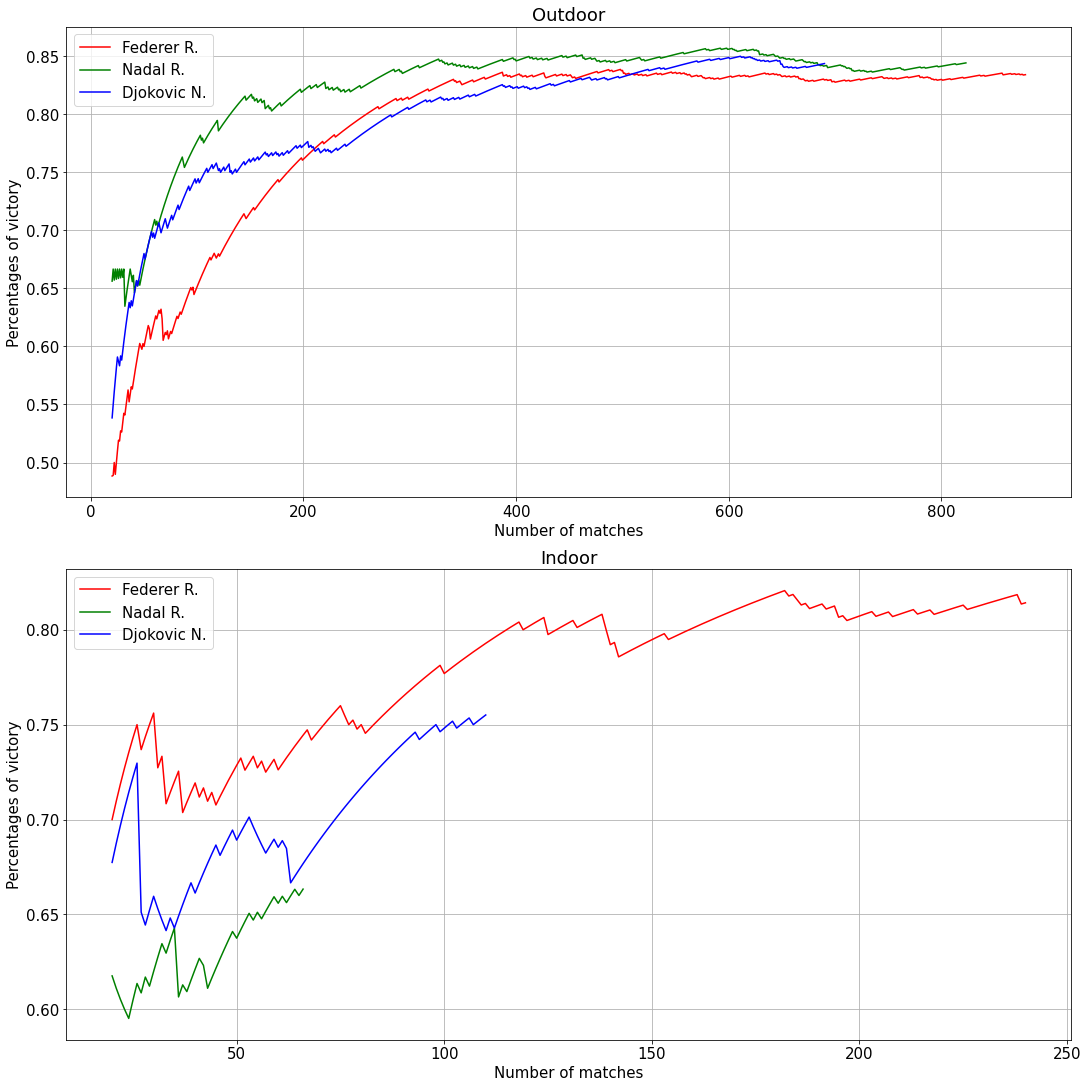

In [15]:
fig, axes = plt.subplots(2, constrained_layout = True, figsize = (15,15))
for court, ax in zip(df_atp.court.unique(), axes.ravel()):
    idx = df_atp.court == court
    names = np.unique((list(df_atp[idx].winner.unique())+ list(df_atp[idx].loser.unique())))
    percentages = {name:[] for name in names }
    counters = {name:0 for name in names}
    victories = {name:0 for name in names}

    for wname,lname in zip(df_atp[idx].winner, df_atp[idx].loser):
        victories[wname] += 1
        counters[wname] += 1
        counters[lname] += 1
        percentages[wname].append((victories[wname])/counters[wname])
    
    print(court)
    for name, color in zip(winners.index, colors):
        matches = range(len(percentages[name]))
        graph = sns.lineplot(x = matches[20:], y = percentages[name][20:], label = name, ax = ax, color = color)
        print(name, sum(percentages[name]))
        
    graph.set(xlabel = 'Number of matches', ylabel = 'Percentages of victory', title = court)
    graph.grid()

Performances seems to be pretty close after 400 matches

Differences of performances based on number of sets of matches

best of3
Federer R. 396.3134904657313
Nadal R. 410.5545828259272
Djokovic N. 397.26349017874065
best of5
Federer R. 294.725617879035
Nadal R. 216.60088391043107
Djokovic N. 208.52380003911998


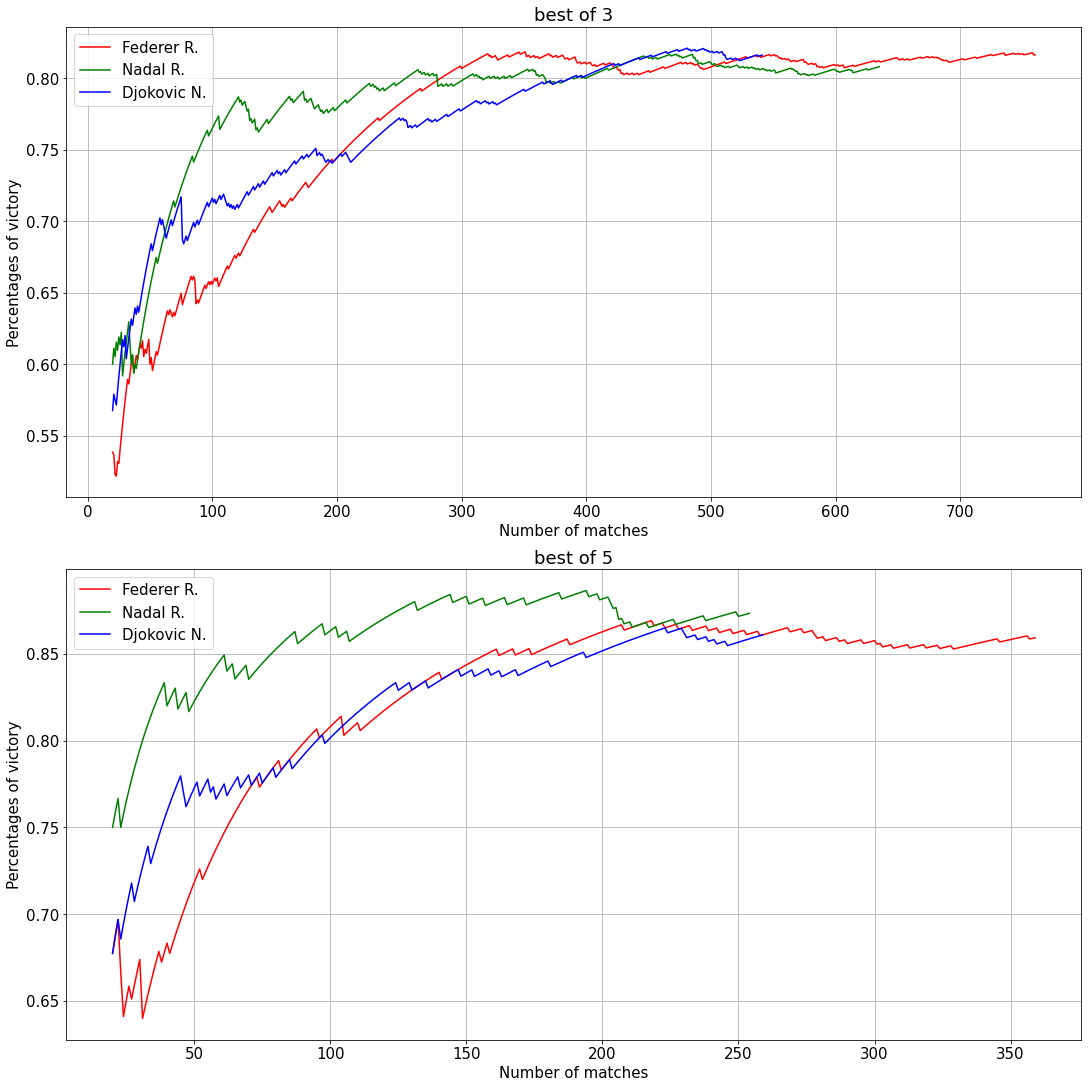

In [16]:
fig, axes = plt.subplots(2, constrained_layout = True, figsize = (15,15))
for bestof, ax in zip(df_atp['best of'].unique(), axes.ravel()):
    idx = df_atp['best of'] == bestof
    names = np.unique((list(df_atp[idx].winner.unique())+ list(df_atp[idx].loser.unique())))
    percentages = {name:[] for name in names }
    counters = {name:0 for name in names}
    victories = {name:0 for name in names}

    for wname,lname in zip(df_atp[idx].winner, df_atp[idx].loser):
        victories[wname] += 1
        counters[wname] += 1
        counters[lname] += 1
        percentages[wname].append((victories[wname])/counters[wname])
    
    print(f'best of{bestof}')
    for name, color in zip(winners.index, colors):
        matches = range(len(percentages[name]))
        graph = sns.lineplot(x = matches[20:], y = percentages[name][20:], label = name, ax = ax, color = color)
        print(name, sum(percentages[name][:530]))
        
    graph.set(xlabel = 'Number of matches', ylabel = 'Percentages of victory', title = f'best of {bestof}')
    graph.grid()

Minor differences, not really intersting
<br>
Let's find the age of winners, binned in three age range

In [17]:
#Request 5
names = np.unique((list(df_atp.winner.unique()) + list(df_atp.loser.unique())))
#age of start supposed 19 (mean of starting age)
start_date = {}
for name in names:
    date = df_atp[(df_atp.winner == name) | (df_atp.loser == name)].date.dt.date.min()
    start_date[name] = date

#Age of players today
mean_start_age = 19
df_start = pd.DataFrame({'name':start_date.keys(), 'startdate':start_date.values()})

df_start['startdate'] = pd.to_datetime(df_start['startdate'])
df_atp['date'] = pd.to_datetime(df_atp['date'])

win_age_distribution_discrete = []
win_age_distribution_continuous = []
win_age_evolution = []

for date in np.unique(df_atp.date.dt.year):
    
    print(date)
    wae = []
    df_start['age'] = mean_start_age + (date - df_start['startdate'].dt.year)
    for name in  df_atp[df_atp.date.dt.year == date]['winner']:
        
        idx = df_start['name'] == name
        age = int(df_start[idx]['age'])
        
        if age >= 16 and age <= 23:
            win_age_distribution_discrete.append(20)
            
        elif age >= 24 and age <= 30:
             win_age_distribution_discrete.append(27)
        
        else:
             win_age_distribution_discrete.append(34)
        
        win_age_distribution_continuous.append(age)
        wae.append(age)
        
    win_age_evolution.append(wae)

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


[Text(0.5, 0, 'Age')]

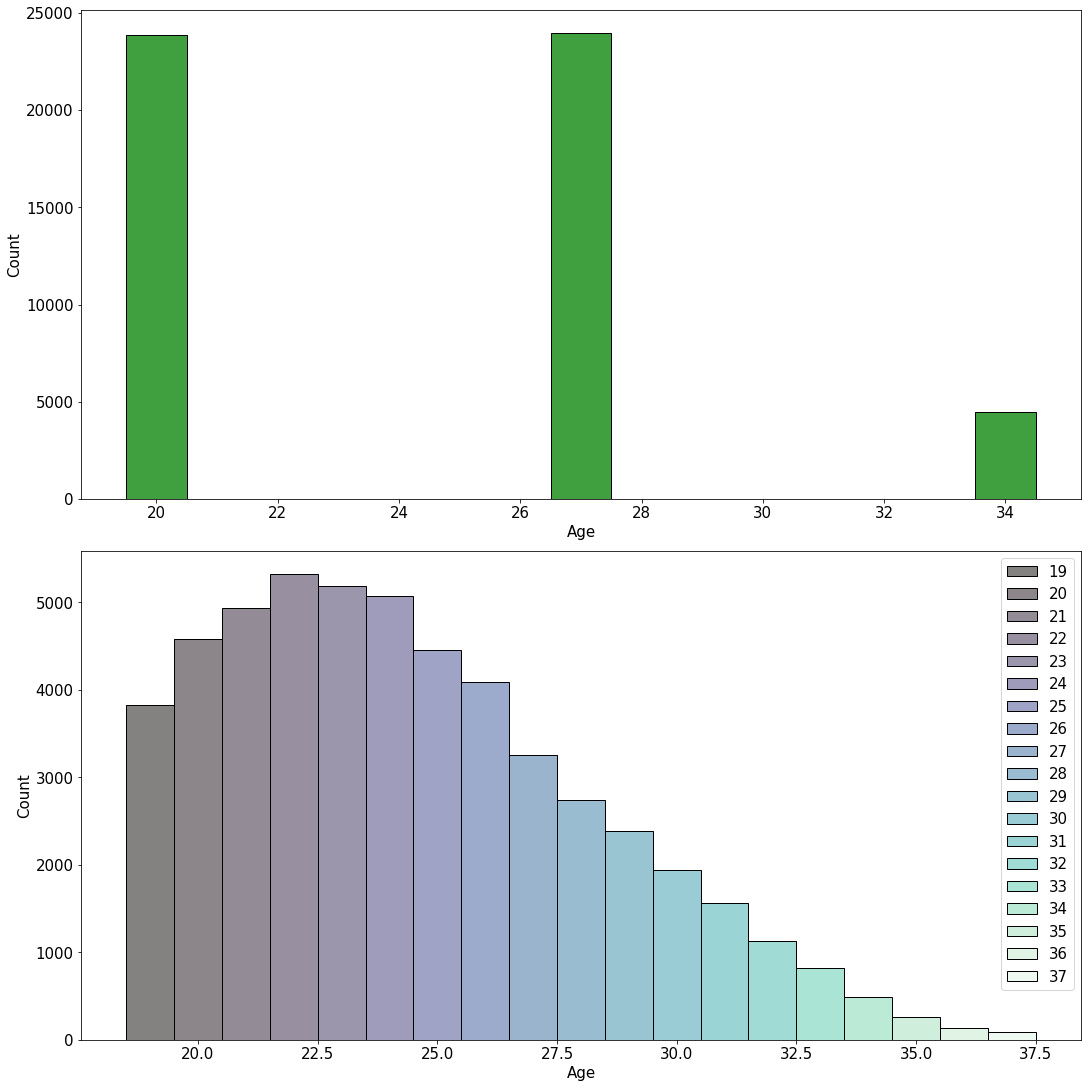

In [18]:
fig, axes = plt.subplots(2, constrained_layout = True, figsize = (15,15))
graph1 = sns.histplot( x = win_age_distribution_discrete, discrete = True, ax = axes[0], color = 'g' ) 
graph2 = sns.histplot( x = win_age_distribution_continuous, discrete = True, ax = axes[1], palette = 'mako', hue = win_age_distribution_continuous)
graph1.set(xlabel = 'Age')
graph2.set(xlabel = 'Age')

Players beetween 16-23 wins as much as players between 24-30
<br>
On the second graph we can see a peak on 22 years

Let's see the evolution of the distribution of winnning

<img src="win_age_evolution.gif" width="1100" align="center">

Same animation with y axis fixed

<img src="win_age_evolution1.gif" width="1100" align="center">

There is an initial bias due to the fact that starting age is estimated at 19 years old 

ANIMATION CODE (not ran on jupyterlab)

from matplotlib.animation import FuncAnimation

fig, axes = plt.subplots(figsize=(12,8))

def animate(i):

    axes.clear()
    
    data = win_age_evolution[i]
    
    graph = sns.histplot(x = data, discrete = True, ax = axes, color = 'r')
    
    graph.set(ylim = (0,800), xlim = (18,38), xlabel = 'Age')

ani = FuncAnimation(fig, animate, frames=len(win_age_evolution),interval=400,repeat=True)

plt.show()

Let's do the same thing for women

In [19]:
#Request 6
df_wta.columns = df_wta.columns.str.lower()
df_wta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29581 entries, 0 to 29580
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wta         29581 non-null  int64         
 1   location    29581 non-null  object        
 2   tournament  29581 non-null  object        
 3   date        29579 non-null  datetime64[ns]
 4   tier        29581 non-null  object        
 5   court       29581 non-null  object        
 6   surface     29581 non-null  object        
 7   round       29581 non-null  object        
 8   best of     29581 non-null  int64         
 9   winner      29581 non-null  object        
 10  loser       29581 non-null  object        
 11  wrank       29543 non-null  float64       
 12  lrank       29502 non-null  float64       
 13  wpts        29543 non-null  float64       
 14  lpts        29502 non-null  float64       
 15  w1          29405 non-null  float64       
 16  l1          29405 non-

In [20]:
#Drop 2 missing dates
idx = df_wta[df_wta.date.isnull() == True]
df_wta.drop(idx.index, axis = 0, inplace = True)
df_wta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29579 entries, 0 to 29580
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wta         29579 non-null  int64         
 1   location    29579 non-null  object        
 2   tournament  29579 non-null  object        
 3   date        29579 non-null  datetime64[ns]
 4   tier        29579 non-null  object        
 5   court       29579 non-null  object        
 6   surface     29579 non-null  object        
 7   round       29579 non-null  object        
 8   best of     29579 non-null  int64         
 9   winner      29579 non-null  object        
 10  loser       29579 non-null  object        
 11  wrank       29541 non-null  float64       
 12  lrank       29500 non-null  float64       
 13  wpts        29541 non-null  float64       
 14  lpts        29500 non-null  float64       
 15  w1          29403 non-null  float64       
 16  l1          29403 non-

In [21]:
names = np.unique((list(df_wta.winner.unique()) + list(df_wta.loser.unique())))
#Trovo la data di esordio di ogni giocatore
start_date = {}
for name in names:
    date = df_wta[(df_wta.winner == name) | (df_wta.loser == name)].date.dt.date.min()
    start_date[name] = date

mean_start_age = 19
df_start = pd.DataFrame({'name':start_date.keys(), 'startdate':start_date.values()})

df_start['startdate'] = pd.to_datetime(df_start['startdate'])
df_wta['date'] = pd.to_datetime(df_wta['date'])
first_date = df_wta.date[0]

win_age_distribution_discrete = []
win_age_distributione_continuous = []
win_age_evolution = []

for date in np.unique(df_wta.date.dt.year):
    
    print(date)
    wae = []
    df_start['age'] = mean_start_age + (date - df_start['startdate'].dt.year)
    for name in  df_wta[df_wta.date.dt.year == date]['winner']:
        
        idx = df_start['name'] == name
        age = int(df_start[idx]['age'])
        
        if age >= 16 and age <= 23:
            win_age_distribution_discrete.append(20)
            
        elif age >= 24 and age <= 30:
             win_age_distribution_discrete.append(27)
        
        else:
             win_age_distribution_discrete.append(34)
        
        win_age_distributione_continuous.append(age)
        wae.append(age)
        
    win_age_evolution.append(wae)

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


[Text(0.5, 0, 'Age')]

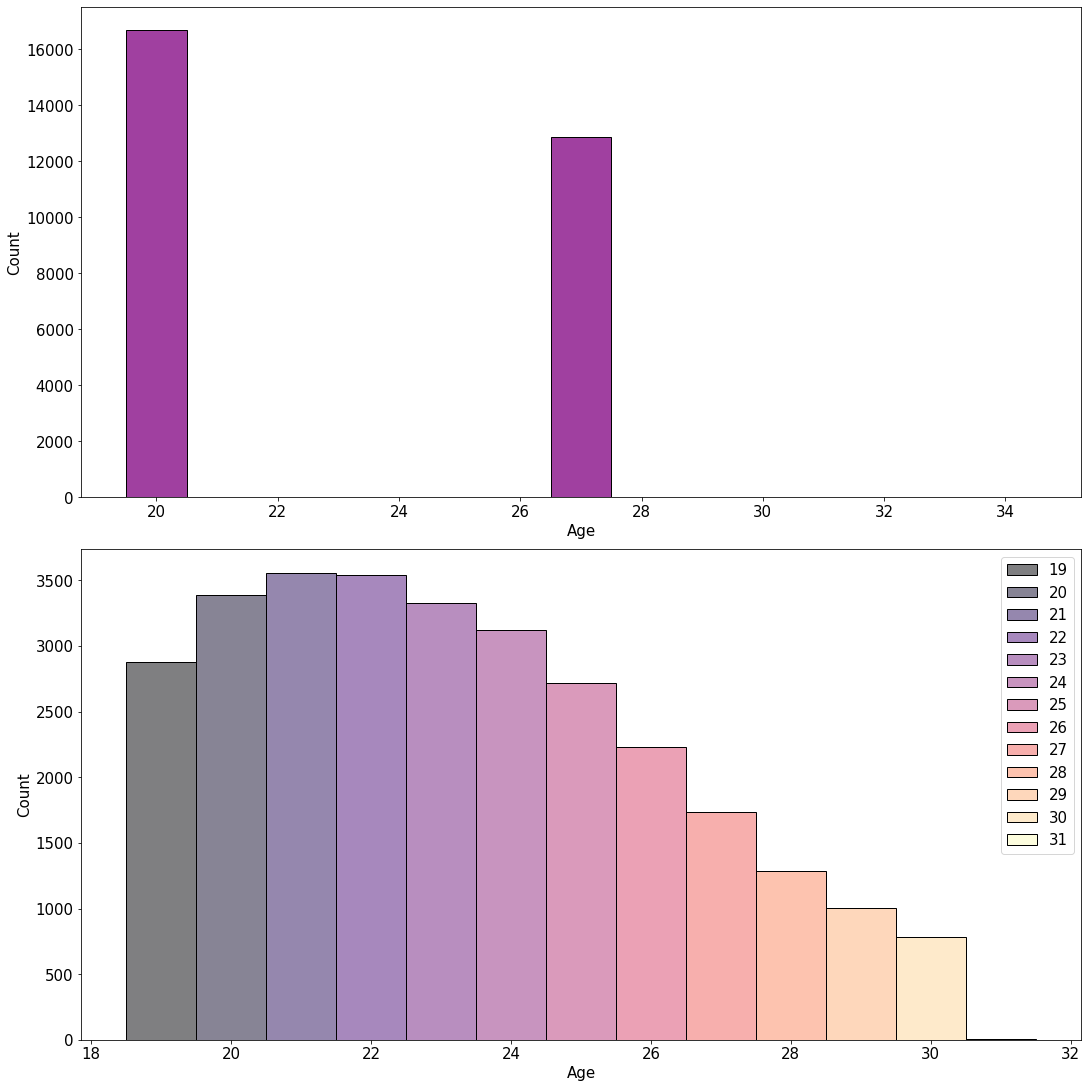

In [22]:
fig, axes = plt.subplots(2, constrained_layout = True, figsize = (15,15))
graph1 = sns.histplot( x = win_age_distribution_discrete, discrete = True, ax = axes[0], color = 'purple' ) 
graph2 = sns.histplot( x = win_age_distributione_continuous, discrete = True, ax = axes[1], palette = 'magma', hue = win_age_distributione_continuous)
graph1.set(xlabel = 'Age')
graph2.set(xlabel = 'Age')

There is a slightly higher rate of vitories in the starting age range, but we need to keep in mind that mean age is lower compared to men

<img src="win_age_evolution_wta.gif" width="1100" align="center">

Same considerations made for male tournament

In [23]:
#Da eseguire tassativamente dopo le 2 celle precedenti
win_age_distribution_discrete = []
for date in np.unique(df_wta.date.dt.year):
    
    print(date)
    df_start['age'] = mean_start_age + (date - df_start['startdate'].dt.year)
    for name in  df_wta[df_wta.date.dt.year == date]['winner']:
        
        idx = df_start['name'] == name
        age = int(df_start[idx]['age'])
        
        if age >= 16 and age <= 22:
            win_age_distribution_discrete.append(20.5)
            
        elif age >= 23 and age <= 26:
             win_age_distribution_discrete.append(24.5)
        
        else:
             win_age_distribution_discrete.append(28.5)
        
        win_age_distributione_continuous.append(age)

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


[Text(0.5, 0, 'Age')]

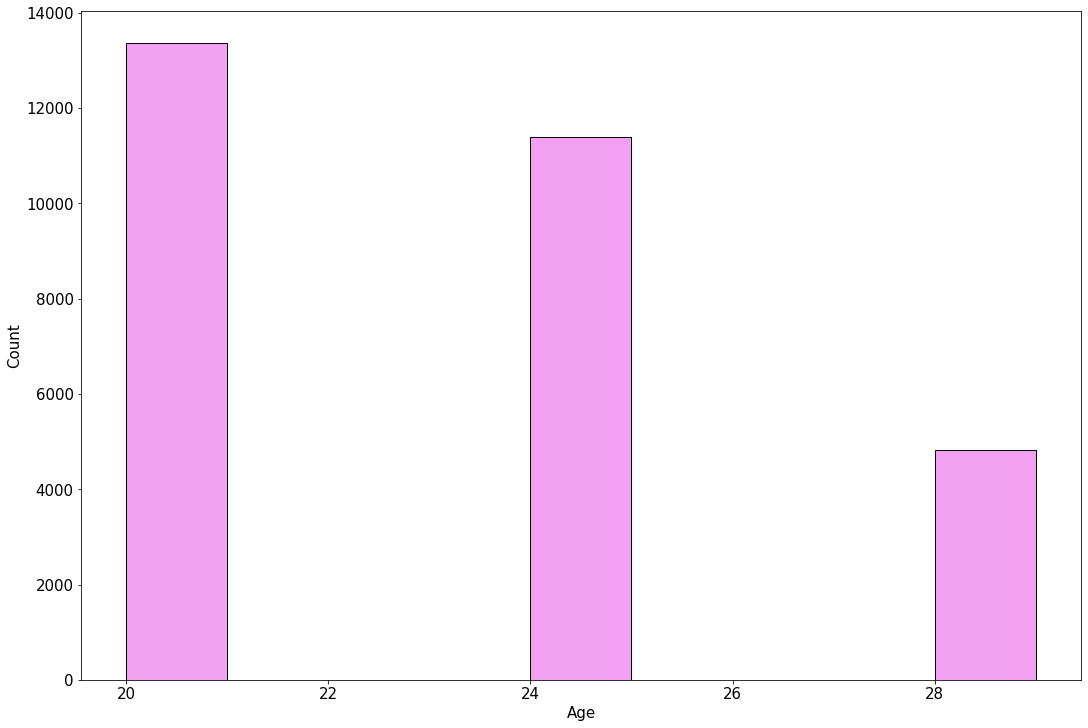

In [24]:
graph = sns.histplot( x = win_age_distribution_discrete, discrete = True, color = 'violet' )
graph.set(xlabel = 'Age')

New age range, same result